In [1]:
# 본 프로젝트를 진행하는 데 필요한 라이브러리를 가져온다.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# (1) 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

In [3]:
# (2) 모델에 입력할 데이터 X 준비하기
df_X = np.array(df_X)
df_X
# df_X.shape

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [4]:
# (3) 모델에 예측할 데이터 y 준비하기
df_y = np.array(df_y)
df_y
#df_y.shape

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
# (4) train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
# (5) 모델 준비하기
W = np.random.rand(10)
b = np.random.rand()
# print(W, b)

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
# (6) 손실함수 loss 정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [8]:
# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

# dW, db = gradient(X, W, b, y)
# print("dW:", dW)
# print("db:", db)

In [9]:
# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.03

In [10]:
# (9) 모델 학습하기

#y_pred = model(X_train, W, b)


losses = []
MAX_ITER = 10**5
for i in range(1, MAX_ITER):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)

    # iteration마다 loss값 확인하기
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

    # 특정 loss값보다 작아지면 학습을 종료한다.
    if losses[-1] < 3000:
        break



Iteration 10 : Loss 12897.2863
Iteration 20 : Loss 8007.5251
Iteration 30 : Loss 6572.4785
Iteration 40 : Loss 6139.8049
Iteration 50 : Loss 5998.0754
Iteration 60 : Loss 5940.9021
Iteration 70 : Loss 5908.4101
Iteration 80 : Loss 5883.2280
Iteration 90 : Loss 5860.3148
Iteration 100 : Loss 5838.2067
Iteration 110 : Loss 5816.4773
Iteration 120 : Loss 5795.0016
Iteration 130 : Loss 5773.7418
Iteration 140 : Loss 5752.6854
Iteration 150 : Loss 5731.8274
Iteration 160 : Loss 5711.1649
Iteration 170 : Loss 5690.6957
Iteration 180 : Loss 5670.4176
Iteration 190 : Loss 5650.3287
Iteration 200 : Loss 5630.4270
Iteration 210 : Loss 5610.7107
Iteration 220 : Loss 5591.1777
Iteration 230 : Loss 5571.8263
Iteration 240 : Loss 5552.6545
Iteration 250 : Loss 5533.6605
Iteration 260 : Loss 5514.8425
Iteration 270 : Loss 5496.1988
Iteration 280 : Loss 5477.7274
Iteration 290 : Loss 5459.4266
Iteration 300 : Loss 5441.2947
Iteration 310 : Loss 5423.3300
Iteration 320 : Loss 5405.5307
Iteration 330 : 

Iteration 2720 : Loss 3586.9590
Iteration 2730 : Loss 3584.1942
Iteration 2740 : Loss 3581.4459
Iteration 2750 : Loss 3578.7139
Iteration 2760 : Loss 3575.9982
Iteration 2770 : Loss 3573.2986
Iteration 2780 : Loss 3570.6149
Iteration 2790 : Loss 3567.9471
Iteration 2800 : Loss 3565.2950
Iteration 2810 : Loss 3562.6584
Iteration 2820 : Loss 3560.0373
Iteration 2830 : Loss 3557.4315
Iteration 2840 : Loss 3554.8409
Iteration 2850 : Loss 3552.2654
Iteration 2860 : Loss 3549.7048
Iteration 2870 : Loss 3547.1591
Iteration 2880 : Loss 3544.6280
Iteration 2890 : Loss 3542.1115
Iteration 2900 : Loss 3539.6095
Iteration 2910 : Loss 3537.1218
Iteration 2920 : Loss 3534.6483
Iteration 2930 : Loss 3532.1890
Iteration 2940 : Loss 3529.7436
Iteration 2950 : Loss 3527.3122
Iteration 2960 : Loss 3524.8945
Iteration 2970 : Loss 3522.4905
Iteration 2980 : Loss 3520.1000
Iteration 2990 : Loss 3517.7229
Iteration 3000 : Loss 3515.3592
Iteration 3010 : Loss 3513.0088
Iteration 3020 : Loss 3510.6714
Iteratio

Iteration 5790 : Loss 3149.1551
Iteration 5800 : Loss 3148.4341
Iteration 5810 : Loss 3147.7155
Iteration 5820 : Loss 3146.9994
Iteration 5830 : Loss 3146.2856
Iteration 5840 : Loss 3145.5742
Iteration 5850 : Loss 3144.8652
Iteration 5860 : Loss 3144.1586
Iteration 5870 : Loss 3143.4543
Iteration 5880 : Loss 3142.7523
Iteration 5890 : Loss 3142.0527
Iteration 5900 : Loss 3141.3554
Iteration 5910 : Loss 3140.6604
Iteration 5920 : Loss 3139.9677
Iteration 5930 : Loss 3139.2773
Iteration 5940 : Loss 3138.5892
Iteration 5950 : Loss 3137.9034
Iteration 5960 : Loss 3137.2198
Iteration 5970 : Loss 3136.5385
Iteration 5980 : Loss 3135.8594
Iteration 5990 : Loss 3135.1826
Iteration 6000 : Loss 3134.5079
Iteration 6010 : Loss 3133.8355
Iteration 6020 : Loss 3133.1653
Iteration 6030 : Loss 3132.4973
Iteration 6040 : Loss 3131.8315
Iteration 6050 : Loss 3131.1679
Iteration 6060 : Loss 3130.5064
Iteration 6070 : Loss 3129.8471
Iteration 6080 : Loss 3129.1900
Iteration 6090 : Loss 3128.5350
Iteratio

Iteration 8950 : Loss 3004.2275
Iteration 8960 : Loss 3003.9509
Iteration 8970 : Loss 3003.6750
Iteration 8980 : Loss 3003.3999
Iteration 8990 : Loss 3003.1255
Iteration 9000 : Loss 3002.8520
Iteration 9010 : Loss 3002.5792
Iteration 9020 : Loss 3002.3072
Iteration 9030 : Loss 3002.0359
Iteration 9040 : Loss 3001.7655
Iteration 9050 : Loss 3001.4958
Iteration 9060 : Loss 3001.2268
Iteration 9070 : Loss 3000.9586
Iteration 9080 : Loss 3000.6912
Iteration 9090 : Loss 3000.4245
Iteration 9100 : Loss 3000.1586


In [11]:
# (10) test 데이터에 대한 성능 확인하기
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2875.4950042072533

In [12]:
# # 실제 정답과 모델 예측값을 잠깐 비교해보자.
# print("정답 | 모델예측값")
# for idx in range(len(y_test)):
#     print(y_test[idx], "|", prediction[idx])

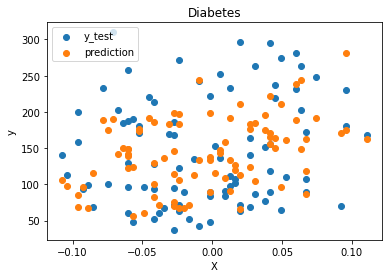

In [13]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Diabetes")
plt.legend(["y_test", "prediction"])
plt.show()